In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
Categories=['telur_bintik','telur_retak', 'telur_normal']
target = []
flat_data = []
images = []

datadir = 'C:/Users/Ghofar/Downloads/dataset-20220706T090136Z-001/dataset/datasets'

In [3]:
for i in Categories:
  print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
  target_class = Categories.index(i)
  # Create data path for all folders under MinorProject
  path = os.path.join(datadir,i)
  # Image resizing, to ensure all images are of same dimensions
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # Skimage normalizes the value of image
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(target_class)
# Convert list to numpy array format
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

Category is: telur_bintik 	Label encoded as: 0
Category is: telur_retak 	Label encoded as: 1
Category is: telur_normal 	Label encoded as: 2


In [4]:
df = pd.DataFrame(flat_data)
# Create a column for output data called Target
df['Target'] = target
# Rows are all the input images (90 images, 30 of each category)
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.000000,0.000000,0.019608,0.000000,0.000000,0.015686,0.000000,0.000000,0.019608,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.015686,0.000000,0.000000,0.019608,0.000000,0.000000,0.015686,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843,0.000000,0.000000,0.015686,0
2,0.000000,0.000000,0.019608,0.000000,0.000000,0.015686,0.000000,0.000000,0.015686,0.000000,...,0.000000,0.000000,0.003922,0.000000,0.000000,0.007843,0.000000,0.000000,0.007843,0
3,0.000000,0.000000,0.035294,0.000000,0.000000,0.031373,0.000000,0.000000,0.027451,0.000000,...,0.000000,0.000000,0.011765,0.000000,0.000000,0.011765,0.000000,0.000000,0.015686,0
4,0.000000,0.000000,0.015686,0.000000,0.000000,0.015686,0.000000,0.000000,0.015686,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.007843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.007843,0.007843,0.011765,0.011765,0.011765,0.011765,0.011765,0.009477,0.011765,0.011765,...,0.047059,0.031373,0.011765,0.050980,0.031373,0.007843,0.070588,0.035294,0.007843,2
346,0.007843,0.003922,0.050980,0.007843,0.007843,0.033333,0.011765,0.011765,0.015686,0.011765,...,0.058824,0.031373,0.023529,0.050654,0.027451,0.031373,0.035294,0.017647,0.058824,2
347,0.003922,0.003922,0.004575,0.003922,0.003922,0.007843,0.003922,0.003922,0.011765,0.003922,...,0.062745,0.039216,0.023856,0.066667,0.035294,0.031373,0.066667,0.035294,0.039542,2
348,0.011765,0.007843,0.027451,0.011765,0.007843,0.027451,0.011765,0.011438,0.019608,0.011765,...,0.078431,0.050980,0.031373,0.076471,0.047059,0.023529,0.058824,0.043137,0.039216,2


AxesImage(54,36;334.8x217.44)


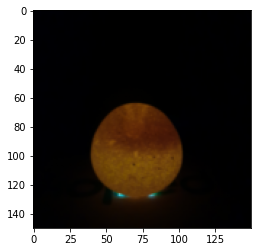

In [5]:
# Display 1 resized image 
print(plt.imshow(images[0]))

In [6]:
# Split data into input and output sets
from sklearn.model_selection import train_test_split

# x is all input values of images and their pixel values (90 images * 67500)
# y is output values or correct label of image (90 images * 1 column of labels)

x = df.iloc[:,:-1].values
y = target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

# Stratify ensures every image is divided in equal proportions (no bias)
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=109,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (350, 67500)
Output data dimensions: (350,)
Dimensions of input training data: (245, 67500)
Dimensions of input testing data: (105, 67500)
Dimensions of output training data: (245,)
Dimensions of output testing data: (105,)


In [7]:
# Check if testing and training data are divided in equal proportions
print("Labels\t\t   Image index considered")
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

Labels		   Image index considered
(array([0, 1, 2]), array([97, 73, 75], dtype=int64))
(array([0, 1, 2]), array([42, 31, 32], dtype=int64))


In [8]:
# Applying Support Vector Machine classifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['poly'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 100, 500, 1000]}]
                    
# Apply GridSearchCV to find best parameters for given dataset
# verbose is used to describe the steps taken to find best parameters
cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 3) 
cv.fit(x_train,y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.776 total time=   3.8s
[CV 2/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.714 total time=   3.9s
[CV 3/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.714 total time=   4.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.837 total time=   4.2s
[CV 5/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.796 total time=   4.0s
[CV 1/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.612 total time=   5.1s
[CV 2/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.531 total time=   5.0s
[CV 3/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.469 total time=   5.0s
[CV 4/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.510 total time=   4.9s
[CV 5/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.633 total time=   5.0s
[CV 1/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.735 total time=   3.5s
[CV 2/5] END ...C=100, gamma=0.001, kernel=poly;,

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 100, 500, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['poly']}],
             verbose=3)

In [9]:
# Display parameters selected by GridSearchCV for SVM 3 classes
# Parameters obtained: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
print("Best parameters to apply are:",cv.best_params_)
# Display model after hyperparameter tuning
svm = cv.best_estimator_
print("Model after tuning is:\n",svm)


Best parameters to apply are: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Model after tuning is:
 SVC(C=1, gamma=0.001, kernel='linear')


In [10]:
# Predict the output of model after above parameters are applied to it
y_prediction = svm.predict(x_test)

In [11]:

# Print expected and predicted output
print("Expected results: ",y_test)
print("Predicted results:",y_prediction)


Expected results:  [1 0 2 2 0 0 0 0 2 0 0 1 1 2 1 1 1 0 1 0 0 1 1 0 0 2 0 1 0 1 2 2 0 1 0 2 2
 2 0 1 0 0 1 0 1 0 1 1 2 2 0 2 2 2 0 0 1 0 1 2 2 2 0 0 0 2 2 0 1 0 2 0 2 2
 0 1 2 2 2 0 2 0 1 0 2 1 1 0 1 2 0 0 1 0 2 2 1 0 0 1 1 0 1 1 2]
Predicted results: [1 0 0 2 0 0 0 0 2 0 0 1 0 2 1 1 1 2 0 0 0 1 1 0 0 2 0 1 0 0 2 2 0 1 0 2 2
 2 0 1 0 0 1 0 0 0 1 1 2 1 0 0 0 2 0 0 1 0 1 2 2 2 0 1 0 2 2 0 1 0 2 0 2 2
 0 1 1 2 2 0 2 2 1 0 2 1 1 0 1 2 0 0 1 0 2 2 1 0 0 1 1 0 1 1 2]


In [12]:
# Evaluate the model using confusion matrix, classification report and accuracy

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix results:\n",confusion_matrix(y_prediction,y_test))
print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

Confusion matrix results:
 [[39  4  3]
 [ 1 27  2]
 [ 2  0 27]]

Classification report of model:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        46
           1       0.87      0.90      0.89        30
           2       0.84      0.93      0.89        29

    accuracy                           0.89       105
   macro avg       0.88      0.89      0.89       105
weighted avg       0.89      0.89      0.89       105

Accuracy score: 88.57142857142857


In [13]:
#import pickle
# Save SVM model in pickle file
#pickle.dump(svm,open("Classification_Model.p","wb"))

In [14]:
# Read byte from pickle model
#test_model = pickle.load(open("Classification_Model.p","rb"))

Dimensions of original image are: (4000, 3000, 3)
PREDICTED OUTPUT IS: telur_retak


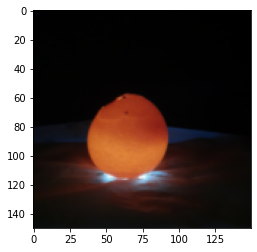

In [15]:
# Testing for a new image
flat_data = []
img_array = imread('C:/Users/Ghofar/Downloads/dataset-20220706T090136Z-001/dataset/telur_pecah/20220607_192755.jpg')
# Resize image
img_preprocessed = preprocessing(img_array)
img_resized = resize(img_preprocessed,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print("Dimensions of original image are:",img_array.shape)
plt.imshow(img_resized)
y_output = test_model.predict(flat_data)
y_output = Categories[y_output[0]]
# URLs to test:
#https://upload.wikimedia.org/wikipedia/commons/d/da/Strawberry_ice_cream_cone_%285076899310%29.jpg
#https://upload.wikimedia.org/wikipedia/commons/7/71/St._Bernard_puppy.jpg
print("PREDICTED OUTPUT IS:",y_output)

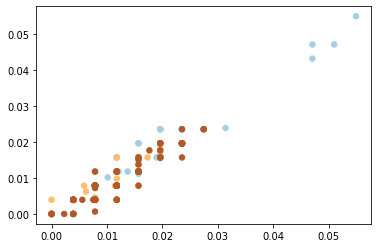

In [15]:
plt.scatter(x, x[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ValueError: X has 2 features, but SVC is expecting 67500 features as input.

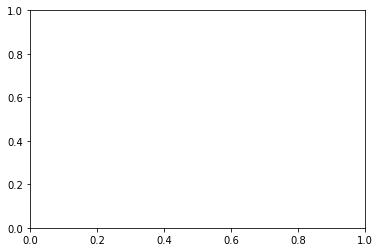